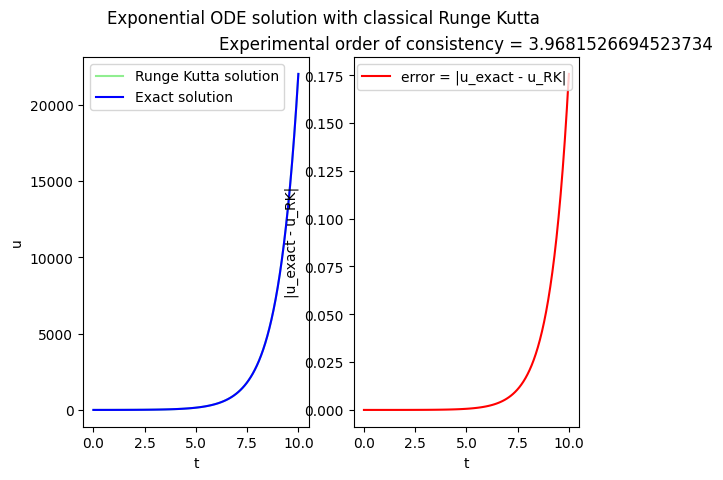

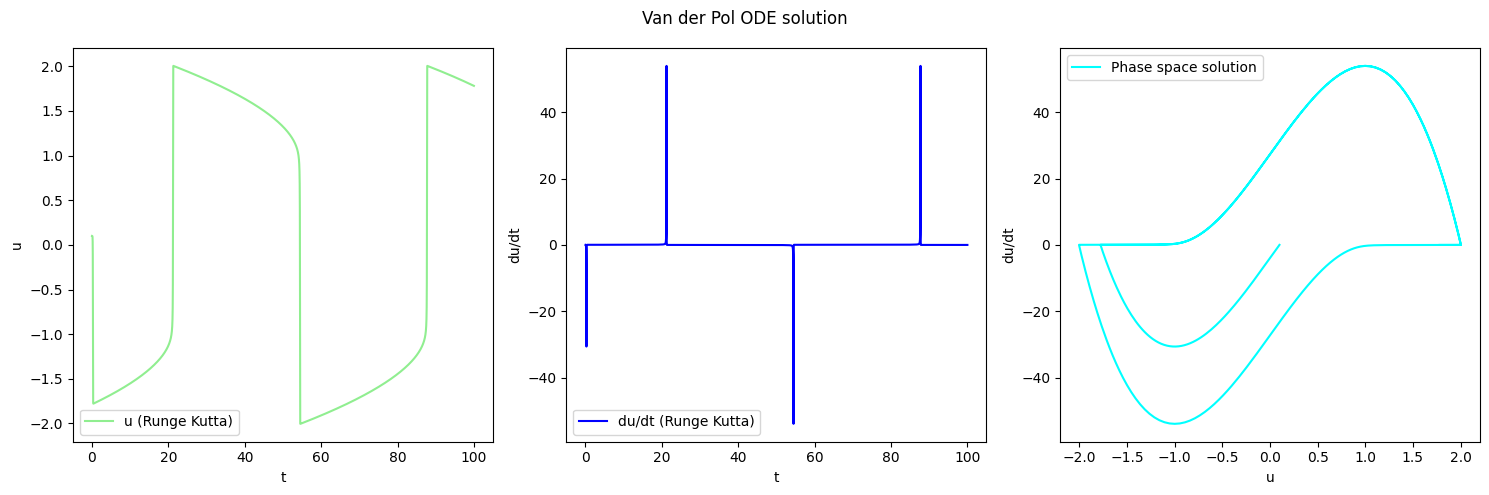

array([[ 1.00000000e-01,  9.99999493e-02,  9.99997946e-02, ...,
         1.78028137e+00,  1.78026086e+00,  1.78024035e+00],
       [ 0.00000000e+00, -1.02008459e-04, -2.08137481e-04, ...,
        -2.05105814e-02, -2.05110351e-02, -2.05114889e-02]])

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

# --------------------------------------------------------------------
# ODEs ---------------------------------------------------------------
# --------------------------------------------------------------------

def ExponentialODE(t,u):
    '''
    Simple test ODE.
    '''
    return u

def ExponentialODEsolution(t):
    '''
    Solution of the test ODE for initial values u(0) = 1.
    '''
    return np.exp(t)

def VanderPolODE(t,u):
    '''
    Van der Pol ODE as a 2x2 ODE system using reduction of order.
    t     : time vector.
    u     : tuple of (u', u'') values.
    return: van der Pol ODE system evaluated at (t,u).
    '''
    y1      = u[1]
    y1prime = 40 * (1- u[0]**2) * u[1] - u[0]
    return [y1, y1prime]

# --------------------------------------------------------------------
# ODE Solver ---------------------------------------------------------
# --------------------------------------------------------------------

def ClassicalRungeKutta(f,t,u0):
    '''
    4 stage Runge Kutta method for ODE systems.
    f     : right hand side of the ODE system.
    t     : time vector.
    u0    : vector of initial values.
    return: matrix U where U[i,:] are the solutions for u^(i)
    '''
    n = len(t)
    m = len(u0)
    U = np.zeros((m, n))
    U[:, 0] = u0
    for j in range(n-1):
        h = t[j+1] - t[j]
        k1 = np.array(f(t[j], U[:, j]))
        k2 = np.array(f(t[j] + (h/2), U[:, j] + k1 * (h/2)))
        k3 = np.array(f(t[j] + (h/2), U[:, j] + k2 * (h/2)))
        k4 = np.array(f(t[j] + h, U[:, j] + k3 * h))
        U[:, j+1] = U[:, j] + (k1 + 2*k2 + 2*k3 + k4) * (h/6)
    return U

# --------------------------------------------------------------------
# Consistency Order --------------------------------------------------
# --------------------------------------------------------------------

def ExperimentalOrderofConsistency(h1,t0,tend,u,f,solver):
    '''
    Returns experimental order of consistency for a ODE solver method.
    h1: The step size.
    t0: initial time.
    tend: final time.
    u: The exact solution of the ODE.
    f: The right hand side of the ODE.
    solver: The solving method for which the consistency order is calculated.
    '''
    h2      = h1/2
    tvector1 = np.linspace(t0,tend,int(1/h1))
    tvector2 = np.linspace(t0,tend,int(1/h2))
    u_exact1 = [u(t) for t in tvector1]
    u_exact2 = [u(t) for t in tvector2]
    u0       = [1.0, 0.0]
    u_sol1   = solver(f, tvector1, u0)
    u_sol2   = solver(f, tvector2, u0)
    delta1   = [abs(u_exact1[i] - u_sol1[0,:][i]) for i in range (len(u_exact1))]
    delta2   = [abs(u_exact2[i] - u_sol2[0,:][i]) for i in range (len(u_exact2))]
    # instead of max also element wise comparisons possible where [::2] would 
    # select every second entry from the twice as long vector delta2
    error1   = np.max(delta1)  
    error2   = np.max(delta2)
    eoc_max  = np.log(error1/error2) / np.log(h1/h2)
    return eoc_max

# --------------------------------------------------------------------
# Evaluation ---------------------------------------------------------
# --------------------------------------------------------------------

def ExponentialTestCaseEvaluation():
    t0       = 0
    u0       = [1] #brackets since vector valued inputs in Runge Kutta
    tend     = 10
    h        = 0.01
    t        = np.linspace(t0,10,int(1/h))
    u_exact  = [ExponentialODEsolution(ti) for ti in t]
    u_RK     = ClassicalRungeKutta(ExponentialODE, t, u0)
    error    = [np.abs(u_exact[i] - u_RK[0,i]) for i in range(len(u_exact))]
    eoc      = ExperimentalOrderofConsistency(h,t0,tend,ExponentialODEsolution,ExponentialODE,ClassicalRungeKutta)
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(t, u_RK[0, :], color='lightgreen', label='Runge Kutta solution')
    axs[0].plot(t, u_exact, color='blue', label='Exact solution')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('u')
    axs[0].legend()
    axs[1].plot(t, error, color='red', label='error = |u_exact - u_RK|')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('|u_exact - u_RK|')
    axs[1].legend()
    eoctitle = "Experimental order of consistency = " + str(eoc)
    plt.title(eoctitle)
    plt.suptitle('Exponential ODE solution with classical Runge Kutta')
    plt.show()
    return u_exact, u_RK, error, eoc

def vanderPolEvaluation():
    t0       = 0
    u0       = [0.1, 0]
    h        = 0.00001 # Step size must <0.0001, 0.001 would still not produce a good result!
    t        = np.linspace(t0, 100, int(1/h))
    u_RK     = ClassicalRungeKutta(VanderPolODE, t, u0)
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(t, u_RK[0, :], color='lightgreen', label='u (Runge Kutta)')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('u')
    axs[0].legend()
    axs[1].plot(t, u_RK[1, :], color='blue', label='du/dt (Runge Kutta)')
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('du/dt')
    axs[1].legend()
    axs[2].plot(u_RK[0, :], u_RK[1, :], color='cyan', label='Phase space solution')
    axs[2].set_xlabel('u')
    axs[2].set_ylabel('du/dt')
    axs[2].legend()
    plt.suptitle('Van der Pol ODE solution')
    plt.tight_layout()
    plt.show()
    return u_RK

# --------------------------------------------------------------------
# Output -------------------------------------------------------------
# --------------------------------------------------------------------

ExponentialTestCaseEvaluation()
vanderPolEvaluation()